In [ ]:
import pandas as pd
import numpy as np
import json
import sklearn

In [ ]:
train = pd.read_excel('/content/Train.xlsx',sheet_name='Train')

In [ ]:
train.head(80)

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57.0,blue-collar,married,primary,no,495.0,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37.0,management,married,tertiary,no,650.0,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29.0,technician,married,secondary,no,265.0,yes,no,cellular,19,aug,795,2.0,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,id_42873,46.0,blue-collar,married,unknown,no,388.0,no,no,unknown,6,jun,869,4.0,0,unknown,0
76,id_40926,32.0,management,married,tertiary,no,0.0,no,no,cellular,22,aug,792,4.0,0,unknown,0
77,id_15656,27.0,self-employed,married,tertiary,no,1934.0,no,no,cellular,20,nov,702,1.0,0,unknown,0
78,id_26783,29.0,blue-collar,married,primary,no,198.0,yes,no,unknown,30,may,876,2.0,0,unknown,0


In [ ]:
train.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
!pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26784 sha256=3bcf9fee3b555d071136beda5b86f69b51333a872beccca4e69de787046572d5
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
import pandasql

In [ ]:
job_avg=pandasql.sqldf('select job_type,avg(customer_age) as age from train group by job_type',globals())

In [ ]:
for i in range(len(train)):
  if train['customer_age'][i] ==' ':
    print(i)

In [ ]:
data = train[train['customer_age'].isnull()]

In [ ]:
job_avg

,job_type,age
0,admin.,38.789989
1,blue-collar,39.393772
2,entrepreneur,41.921854
3,housemaid,45.838213
4,management,40.006956
5,retired,61.158442
6,self-employed,39.385167
7,services,38.393217
8,student,26.070994
9,technician,38.871861


In [ ]:
avg_dict=zip(job_avg.job_type,job_avg.age)

In [ ]:
type(avg_dict)

zip

In [ ]:
avg_dict = dict(avg_dict)

In [ ]:
avg_dict

{'admin.': 38.78998870907038,
 'blue-collar': 39.393772171856526,
 'entrepreneur': 41.92185430463576,
 'housemaid': 45.8382126348228,
 'management': 40.006955810147296,
 'retired': 61.15844155844156,
 'self-employed': 39.38516746411483,
 'services': 38.39321723189734,
 'student': 26.070993914807303,
 'technician': 38.87186058431573,
 'unemployed': 40.18401206636501,
 'unknown': 46.61744966442953}

In [ ]:
data.reset_index(inplace=True)

In [ ]:
data.head()

,index,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,79,id_1636,NaN,blue-collar,married,primary,no,1.0,no,no,unknown,9,jun,866,1.0,0,unknown,0
1,117,id_40985,NaN,management,divorced,tertiary,no,6568.0,yes,no,cellular,17,nov,705,2.0,0,unknown,0
2,158,id_37846,NaN,technician,married,secondary,no,274.0,no,no,cellular,25,aug,789,6.0,0,unknown,0
3,216,id_22439,NaN,retired,married,primary,no,208.0,no,no,unknown,12,may,894,1.0,0,unknown,0
4,245,id_34299,NaN,blue-collar,divorced,unknown,yes,-273.0,yes,yes,unknown,23,may,883,2.0,0,unknown,0


In [ ]:
for i in range(len(data)):
  data['customer_age'][i] = avg_dict.get(data['job_type'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.head()

,index,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,79,id_1636,39.393772,blue-collar,married,primary,no,1.0,no,no,unknown,9,jun,866,1.0,0,unknown,0
1,117,id_40985,40.006956,management,divorced,tertiary,no,6568.0,yes,no,cellular,17,nov,705,2.0,0,unknown,0
2,158,id_37846,38.871861,technician,married,secondary,no,274.0,no,no,cellular,25,aug,789,6.0,0,unknown,0
3,216,id_22439,61.158442,retired,married,primary,no,208.0,no,no,unknown,12,may,894,1.0,0,unknown,0
4,245,id_34299,39.393772,blue-collar,divorced,unknown,yes,-273.0,yes,yes,unknown,23,may,883,2.0,0,unknown,0


In [ ]:
data['customer_age']=data['customer_age'].round(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
data.head()

,index,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,79,id_1636,39.0,blue-collar,married,primary,no,1.0,no,no,unknown,9,jun,866,1.0,0,unknown,0
1,117,id_40985,40.0,management,divorced,tertiary,no,6568.0,yes,no,cellular,17,nov,705,2.0,0,unknown,0
2,158,id_37846,39.0,technician,married,secondary,no,274.0,no,no,cellular,25,aug,789,6.0,0,unknown,0
3,216,id_22439,61.0,retired,married,primary,no,208.0,no,no,unknown,12,may,894,1.0,0,unknown,0
4,245,id_34299,39.0,blue-collar,divorced,unknown,yes,-273.0,yes,yes,unknown,23,may,883,2.0,0,unknown,0


In [ ]:
train.isnull().sum()

customer_id                     0
customer_age                  477
job_type                        0
marital                       107
education                       0
default                         0
balance                       277
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
avg_balance = pandasql.sqldf('select job_type,avg(balance) as balance from train group by job_type',globals())

In [ ]:
avg_balance

,job_type,balance
0,admin.,1281.677350
1,blue-collar,1137.010400
2,entrepreneur,1791.670251
3,housemaid,1239.608787
4,management,1885.670997
5,retired,2156.575792
6,self-employed,1619.801923
7,services,1039.130196
8,student,1657.933333
9,technician,1266.253147


In [ ]:
avg_balance = zip(avg_balance.job_type,avg_balance.balance)

In [ ]:
avg_balance=dict(avg_balance)

In [ ]:
data1=train[train['balance'].isnull()]

In [ ]:
data1.head()

,level_0,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,index
42,42,id_41656,41.0,management,married,secondary,no,NaN,yes,no,unknown,13,may,893,1.0,0,unknown,0,NaN
87,88,id_34013,62.0,admin.,married,secondary,no,NaN,no,no,cellular,22,dec,670,1.0,9,success,1,NaN
391,398,id_5521,46.0,blue-collar,married,secondary,no,NaN,yes,no,cellular,29,aug,785,10.0,0,unknown,0,NaN
509,518,id_27830,28.0,blue-collar,married,primary,no,NaN,yes,no,unknown,9,may,897,1.0,0,unknown,0,NaN
1015,1037,id_21019,24.0,self-employed,married,secondary,no,NaN,yes,no,unknown,26,may,880,2.0,0,unknown,0,NaN


In [ ]:
data1.reset_index(drop=True,inplace=True)

In [ ]:
for i in range(len(data1)):
  data1['balance'][i] = avg_balance.get(data1['job_type'][i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data1['balance']=data1['balance'].round(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
train = train.dropna(axis=0,subset=['balance'])

In [ ]:
train = pd.concat([train,data1],axis=0)

In [ ]:
len(train)

23880

In [ ]:
train.to_excel('train.xlsx')

In [ ]:
train.reset_index(drop=True,inplace=True)

In [ ]:
train.to_excel('train_cleaned.xlsx')

In [ ]:
train = pd.read_excel('/content/train_cleaned.xlsx')

In [ ]:
train.head()

,Unnamed: 0,level_0,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed,index
0,0,0,id_32289,34,blue-collar,married,secondary,no,934,no,yes,cellular,18,nov,704,2.0,1,other,0,NaN
1,1,1,id_40992,41,blue-collar,married,primary,no,1352,yes,no,cellular,13,may,893,2.0,0,unknown,0,NaN
2,2,2,id_41178,57,blue-collar,married,primary,no,495,no,no,cellular,18,aug,796,4.0,0,unknown,1,NaN
3,3,3,id_35102,37,management,married,tertiary,no,650,yes,NaN,unknown,26,may,880,1.0,0,unknown,0,NaN
4,4,4,id_34750,29,technician,married,secondary,no,265,yes,no,cellular,19,aug,795,2.0,0,unknown,0,NaN


In [ ]:
train.drop(['Unnamed: 0','level_0','index'],axis=1,inplace=True)

In [ ]:
train.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34,blue-collar,married,secondary,no,934,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41,blue-collar,married,primary,no,1352,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57,blue-collar,married,primary,no,495,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37,management,married,tertiary,no,650,yes,NaN,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29,technician,married,secondary,no,265,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

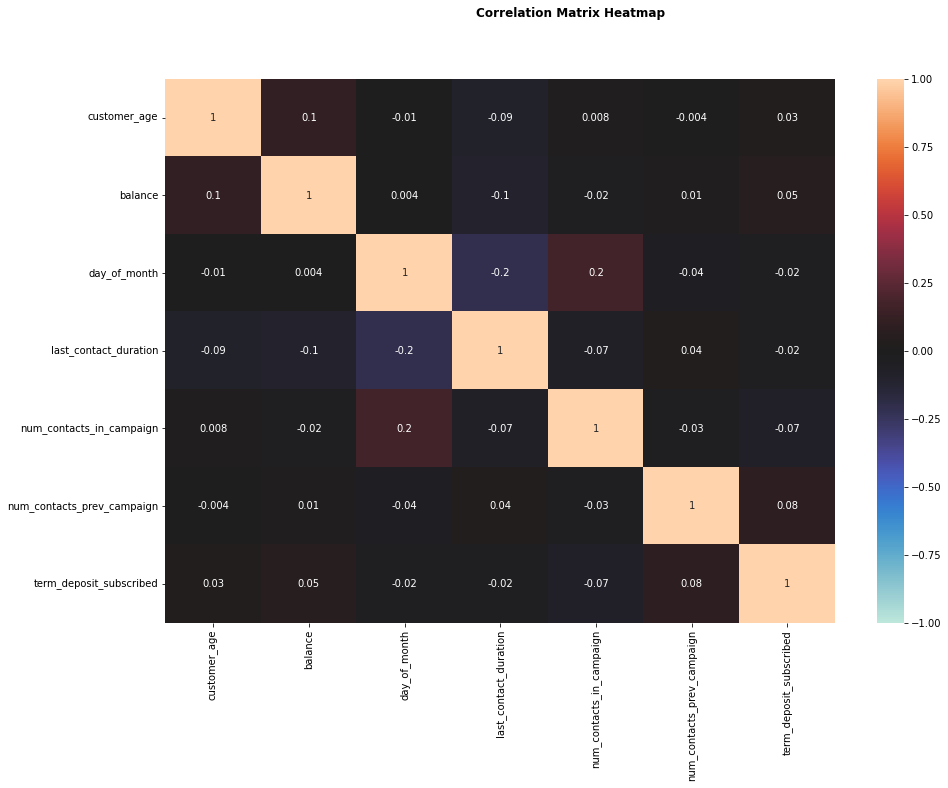

In [ ]:
# using heatmap to visualize correlation between the columns
fig= plt.figure(figsize=(15,10))
ax = sns.heatmap(train.corr(), annot=True, fmt='.1g', 
                 vmin=-1, vmax=1, center= 0)
# setting the parameters
fig.suptitle('Correlation Matrix Heatmap',fontweight='bold')
plt.show()

In [ ]:
train.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34,blue-collar,married,secondary,no,934,no,yes,cellular,18,nov,704,2.0,1,other,0
1,41,blue-collar,married,primary,no,1352,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,57,blue-collar,married,primary,no,495,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,37,management,married,tertiary,no,650,yes,unknown,unknown,26,may,880,1.0,0,unknown,0
4,29,technician,married,secondary,no,265,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [ ]:
train.columns

Index(['customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome', 'term_deposit_subscribed'],
      dtype='object')

In [ ]:
test=test.loc[:,['customer_id','customer_age', 'job_type', 'marital', 'education', 'default',
       'balance', 'housing_loan', 'personal_loan', 'communication_type',
       'day_of_month', 'month', 'last_contact_duration',
       'num_contacts_in_campaign', 'num_contacts_prev_campaign',
       'prev_campaign_outcome']]

In [ ]:
train.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                         0
housing_loan                    0
personal_loan                 113
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

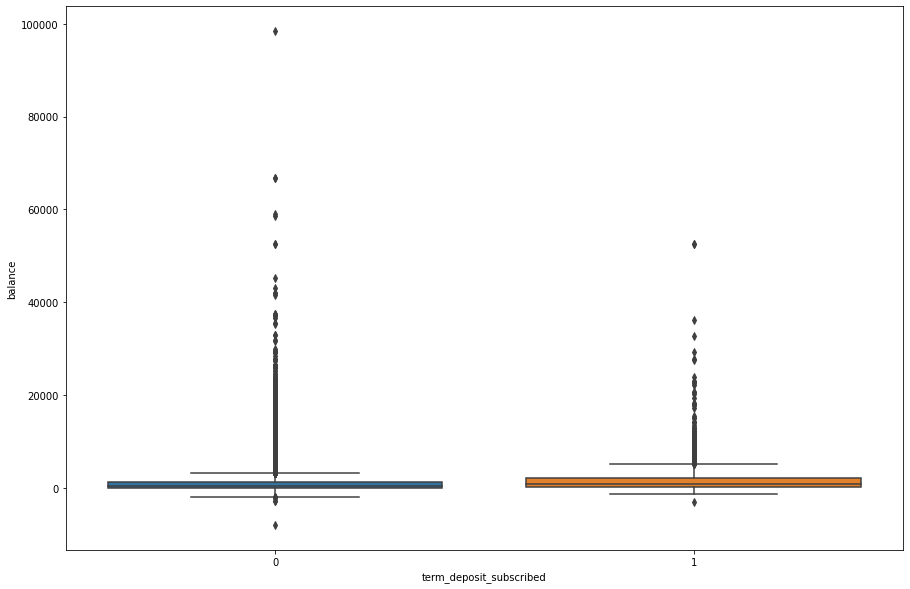

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='balance',x='term_deposit_subscribed',data=train)

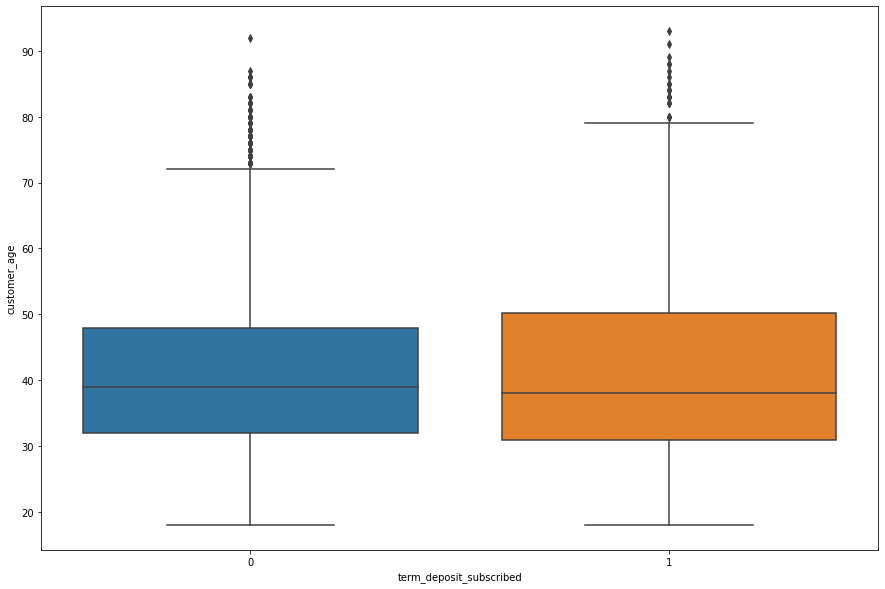

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='customer_age',x='term_deposit_subscribed',data=train)

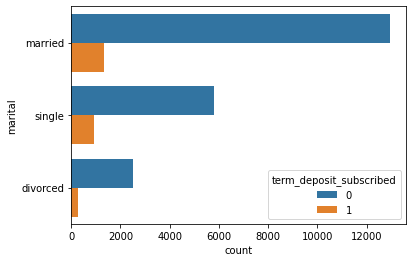

In [ ]:
sns.countplot(y='marital',data=train,hue='term_deposit_subscribed')

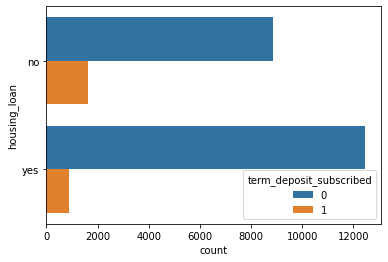

In [ ]:
sns.countplot(y='housing_loan',data=train,hue='term_deposit_subscribed')

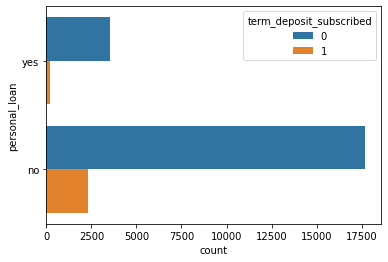

In [ ]:
sns.countplot(y='personal_loan',data=train,hue='term_deposit_subscribed')

In [ ]:
train['personal_loan'] = train['personal_loan'].fillna('unknown')

In [ ]:
train.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                         0
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='num_contacts_in_campaign',x='term_deposit_subscribed',data=train)

NameError: ignored

In [ ]:
train.isnull().sum()

customer_id                     0
customer_age                    0
job_type                        0
marital                       107
education                       0
default                         0
balance                         0
housing_loan                    0
personal_loan                   0
communication_type              0
day_of_month                    0
month                           0
last_contact_duration           0
num_contacts_in_campaign       96
num_contacts_prev_campaign      0
prev_campaign_outcome           0
term_deposit_subscribed         0
dtype: int64

In [ ]:
train['marital'].value_counts()

married     14271
single       6707
divorced     2795
Name: marital, dtype: int64

In [ ]:
train.dropna(subset=['marital'],inplace=True)

In [ ]:
train.head()

,customer_id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_32289,34,blue-collar,married,secondary,no,934,no,yes,cellular,18,nov,704,2.0,1,other,0
1,id_40992,41,blue-collar,married,primary,no,1352,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,id_41178,57,blue-collar,married,primary,no,495,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,id_35102,37,management,married,tertiary,no,650,yes,unknown,unknown,26,may,880,1.0,0,unknown,0
4,id_34750,29,technician,married,secondary,no,265,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [ ]:
train.drop('customer_id',inplace=True,axis=1)

In [ ]:
train.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,34,blue-collar,married,secondary,no,934,no,yes,cellular,18,nov,704,2.0,1,other,0
1,41,blue-collar,married,primary,no,1352,yes,no,cellular,13,may,893,2.0,0,unknown,0
2,57,blue-collar,married,primary,no,495,no,no,cellular,18,aug,796,4.0,0,unknown,1
3,37,management,married,tertiary,no,650,yes,unknown,unknown,26,may,880,1.0,0,unknown,0
4,29,technician,married,secondary,no,265,yes,no,cellular,19,aug,795,2.0,0,unknown,0


In [ ]:
X.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_admin.,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,prev_campaign_outcome_jun,prev_campaign_outcome_mar,prev_campaign_outcome_may,prev_campaign_outcome_nov,prev_campaign_outcome_oct,prev_campaign_outcome_sep,communication_type_failure,communication_type_other,communication_type_success,communication_type_unknown
0,0.213333,0.084123,0.566667,0.120112,0.016129,1,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
1,0.306667,0.088050,0.400000,0.648045,0.016129,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0.520000,0.079999,0.566667,0.377095,0.048387,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.253333,0.081455,0.833333,0.611732,0.000000,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.146667,0.077838,0.600000,0.374302,0.016129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = pd.get_dummies(train,drop_first=True,)

In [ ]:
X.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,34,934,18,704,2.0,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,41,1352,13,893,2.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,57,495,18,796,4.0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,37,650,26,880,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,29,265,19,795,2.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,job_type_management,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,28.0,285.0,26,849,4.0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,46.0,656.0,5,990,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,34.0,2.0,20,886,3.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,65.0,2880.0,23,913,1.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,52.0,1779.0,19,703,3.0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [ ]:
from sklearn import preprocessing

In [ ]:
normalizer=preprocessing.MinMaxScaler()

In [ ]:
X['customer_age']=normalizer.fit_transform(np.array(X['customer_age']).reshape(-1,1))

In [ ]:
train['num_contacts_in_campaign'].fillna(2.77,inplace=True)

In [ ]:
train.to_csv('cleaned.csv')

In [ ]:
X.isnull().sum()

customer_age                     0
balance                          0
day_of_month                     0
last_contact_duration            0
num_contacts_in_campaign         0
num_contacts_prev_campaign       0
term_deposit_subscribed          0
job_type_blue-collar             0
job_type_entrepreneur            0
job_type_housemaid               0
job_type_management              0
job_type_retired                 0
job_type_self-employed           0
job_type_services                0
job_type_student                 0
job_type_technician              0
job_type_unemployed              0
job_type_unknown                 0
marital_married                  0
marital_single                   0
education_secondary              0
education_tertiary               0
education_unknown                0
default_yes                      0
housing_loan_yes                 0
personal_loan_unknown            0
personal_loan_yes                0
communication_type_telephone     0
communication_type_u

In [ ]:
X['num_contacts_in_campaign'] = normalizer.fit_transform(np.array(X['num_contacts_in_campaign']).reshape(-1,1))
X['balance'] = normalizer.fit_transform(np.array(X['balance']).reshape(-1,1))
X['day_of_month'] = normalizer.fit_transform(np.array(X['day_of_month']).reshape(-1,1))
X['last_contact_duration'] = normalizer.fit_transform(np.array(X['last_contact_duration']).reshape(-1,1))

In [ ]:
X.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign,term_deposit_subscribed,job_type_blue-collar,job_type_entrepreneur,job_type_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,prev_campaign_outcome_other,prev_campaign_outcome_success,prev_campaign_outcome_unknown
0,0.213333,0.084123,0.566667,0.120112,0.016129,1,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,0.306667,0.088050,0.400000,0.648045,0.016129,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.520000,0.079999,0.566667,0.377095,0.048387,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0.253333,0.081455,0.833333,0.611732,0.000000,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,0.146667,0.077838,0.600000,0.374302,0.016129,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X['term_deposit_subscribed'].value_counts()

0    21245
1     2528
Name: term_deposit_subscribed, dtype: int64